## Loading the Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


### EDA

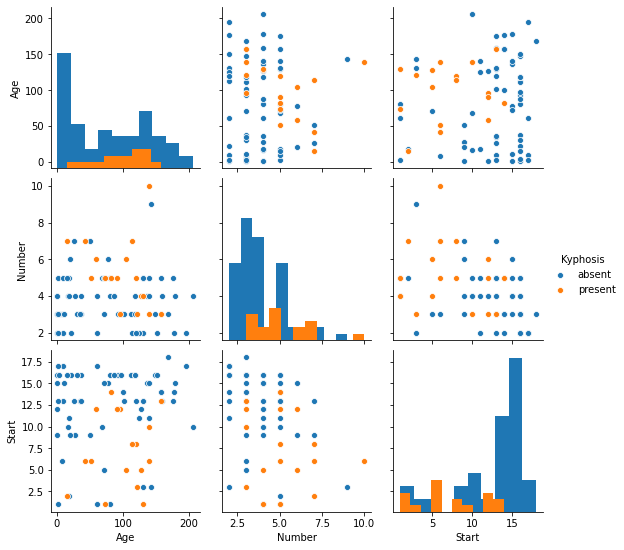

In [4]:
sns.pairplot(df, hue="Kyphosis", diag_kind = "hist")

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop("Kyphosis", axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state=42)

# Decision Tree 

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtc = DecisionTreeClassifier()

In [35]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [11]:
pred = dtc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.75      0.71      0.73        21
     present       0.14      0.17      0.15         6

    accuracy                           0.59        27
   macro avg       0.45      0.44      0.44        27
weighted avg       0.62      0.59      0.60        27



#### The accuracy obtained is considerably low for decision tree.

In [14]:
print(confusion_matrix(y_test, pred))

[[15  6]
 [ 5  1]]


#### The false positive and true negative values should be decreased.

## Tree Visualization

In [29]:
from sklearn import tree

clf = DecisionTreeClassifier(max_depth = 10, 
                             random_state = 0)
clf.fit(X_train, y_train)
clf.predict(X_test)

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'present', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present'], dtype=object)

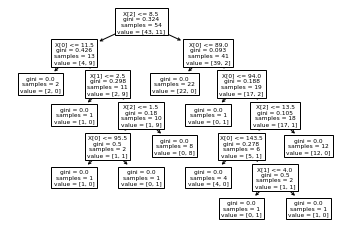

In [30]:
tree.plot_tree(clf);

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Prediction and Evaluation

In [39]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      0.95      0.89        21
     present       0.67      0.33      0.44         6

    accuracy                           0.81        27
   macro avg       0.75      0.64      0.67        27
weighted avg       0.80      0.81      0.79        27



### The accuracy and prescision are comparitively good. 

In [37]:
print(confusion_matrix(y_test, rfc_pred))

[[20  1]
 [ 4  2]]


#### The false positive and true negative values are decreased. The true positive and false negative values are better.

### The accuracy and confusion matrix is much better in case of random forest than decision tree. Hence random forest model is the suitable approach for this dataset.

### The decision tree model gives high importance to a particular set of features. But the random forest chooses features randomly during the training process. Therefore, it does not depend highly on any specific set of features. Therefore, the random forest can generalize over the data in a better way. This randomized feature selection makes random forest much more accurate than a decision tree.